In [2]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline

In [3]:
# Ignore warning messages
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
df_train = pd.read_csv(r'D:\Kaggle\House price prediction\train.csv')

In [5]:
# Check the columns present in the dataset
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Display the first few rows of the dataset
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Analyzing the distribution of house sale prices
# Summary statistics of the 'SalePrice' column
df_train['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

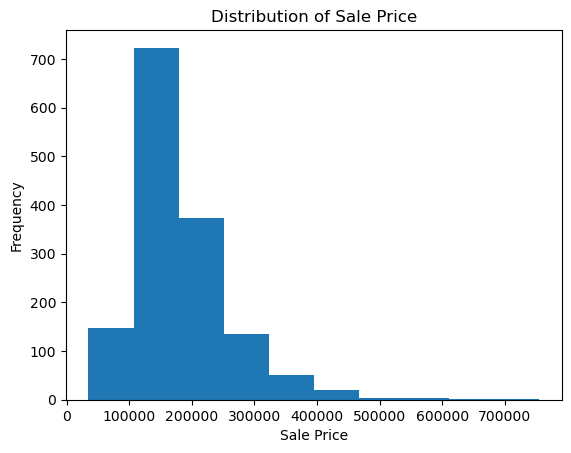

In [10]:
# Visualize the distribution of 'SalePrice' using a histogram
plt.hist(df_train['SalePrice'], bins=10)

# Adding labels and title to the plot
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')

# Display the plot
plt.show()

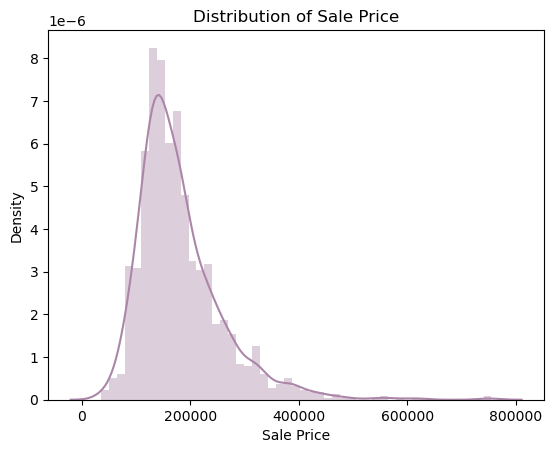

In [11]:
import seaborn as sns

# Plotting a distribution plot to visualize the distribution of 'SalePrice'
sns.distplot(df_train['SalePrice'], color='#ac86a8')

# Adding labels and title to the plot
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Distribution of Sale Price')

# Display the plot
plt.show()

In [12]:
# Additional insights about the distribution of 'SalePrice'
# The distribution of house sale prices deviates from the normal distribution.
# It has appreciable positive skewness, indicating a longer tail on the right side.
# The distribution also shows peakedness.

In [13]:
# Calculating skewness and kurtosis of 'SalePrice'
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())


Skewness: 1.882876
Kurtosis: 6.536282


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

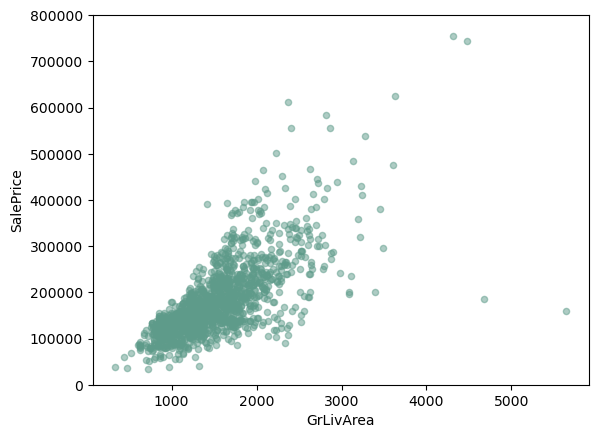

In [14]:
# Relationship with numerical variables
# Scatter plot between 'Above Ground Living Area (in square feet)' and 'SalePrice'
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000), color='#5e9b8a', alpha=0.5)

In [15]:
# There is a visible correlation and a positive linear relationship
#between 'SalePrice' and 'Above Ground Living Area'

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

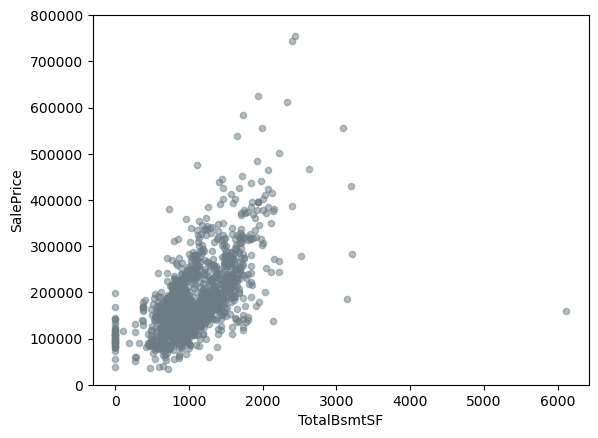

In [16]:
# Scatter plot between 'Total Basement Area (in square feet)' and 'SalePrice'
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000), color='#6b7c85', alpha=0.5)

In [17]:
# There is a strong relationship between 'SalePrice' and 'Total Basement Area'

(-0.5, 9.5, 0.0, 800000.0)

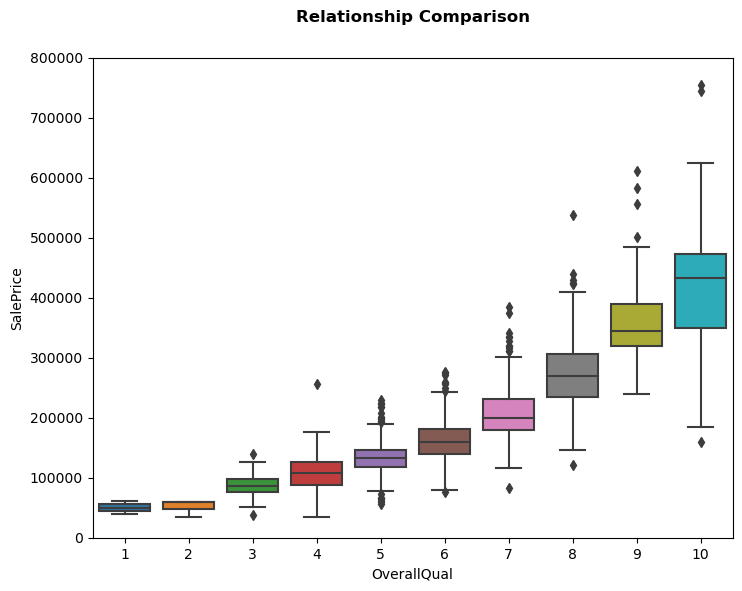

In [18]:
# Relationship with categorical features
# Box plot comparing 'Overall Quality' and 'SalePrice'
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
f.suptitle('Relationship Comparison', fontsize=12, fontweight='bold')
f.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, wspace=0.2, hspace=0.3)

fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)


In [19]:
# The box plot displays the distribution of 'SalePrice' for each level of 'Overall Quality'

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

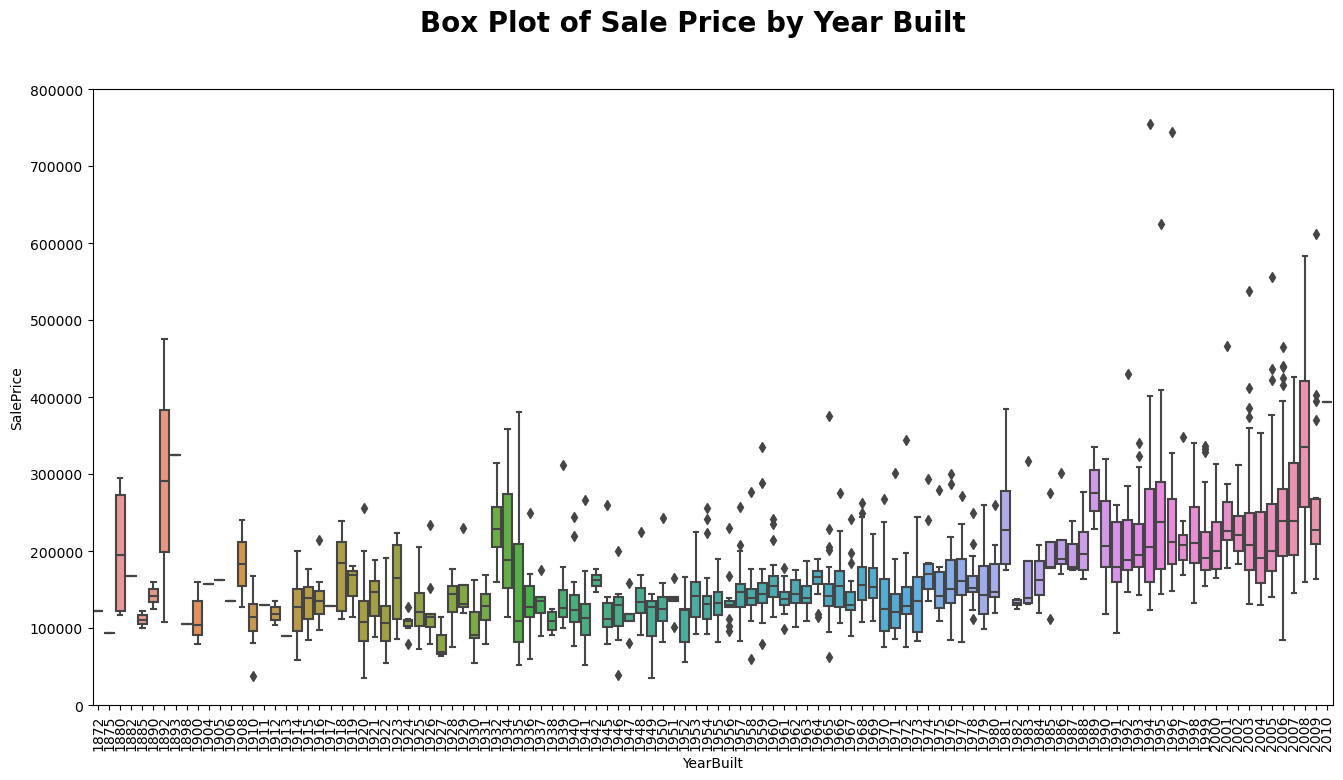

In [20]:
# Box plot of 'SalePrice' by 'YearBuilt'
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
f.suptitle("Box Plot of Sale Price by Year Built", fontsize=20, fontweight='bold')
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

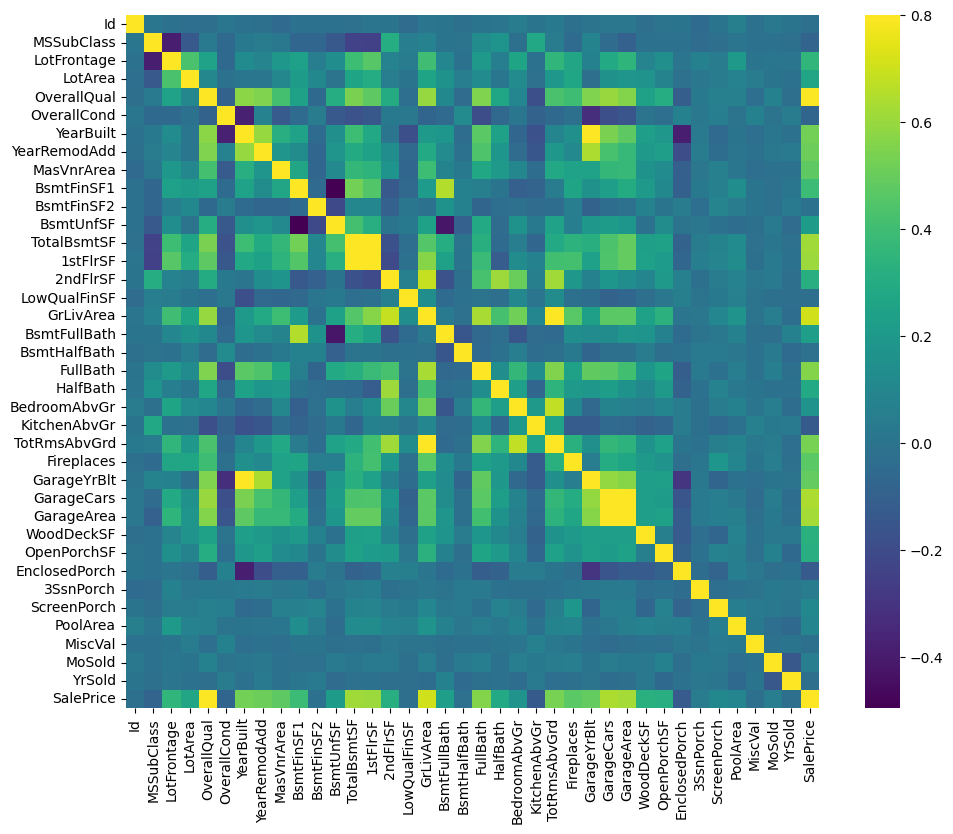

In [21]:
# Correlation matrix (heatmap style)
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='viridis')

# Display the plot
plt.show()

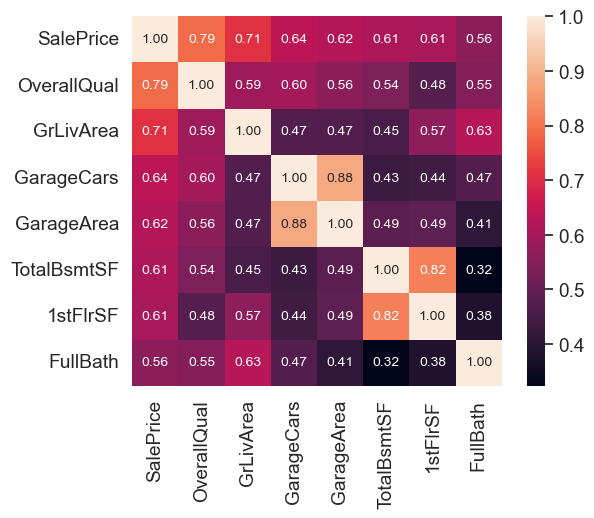

In [22]:
# Correlation matrix of 'SalePrice' (zoomed heatmap style)
k = 8  # Number of variables for the heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

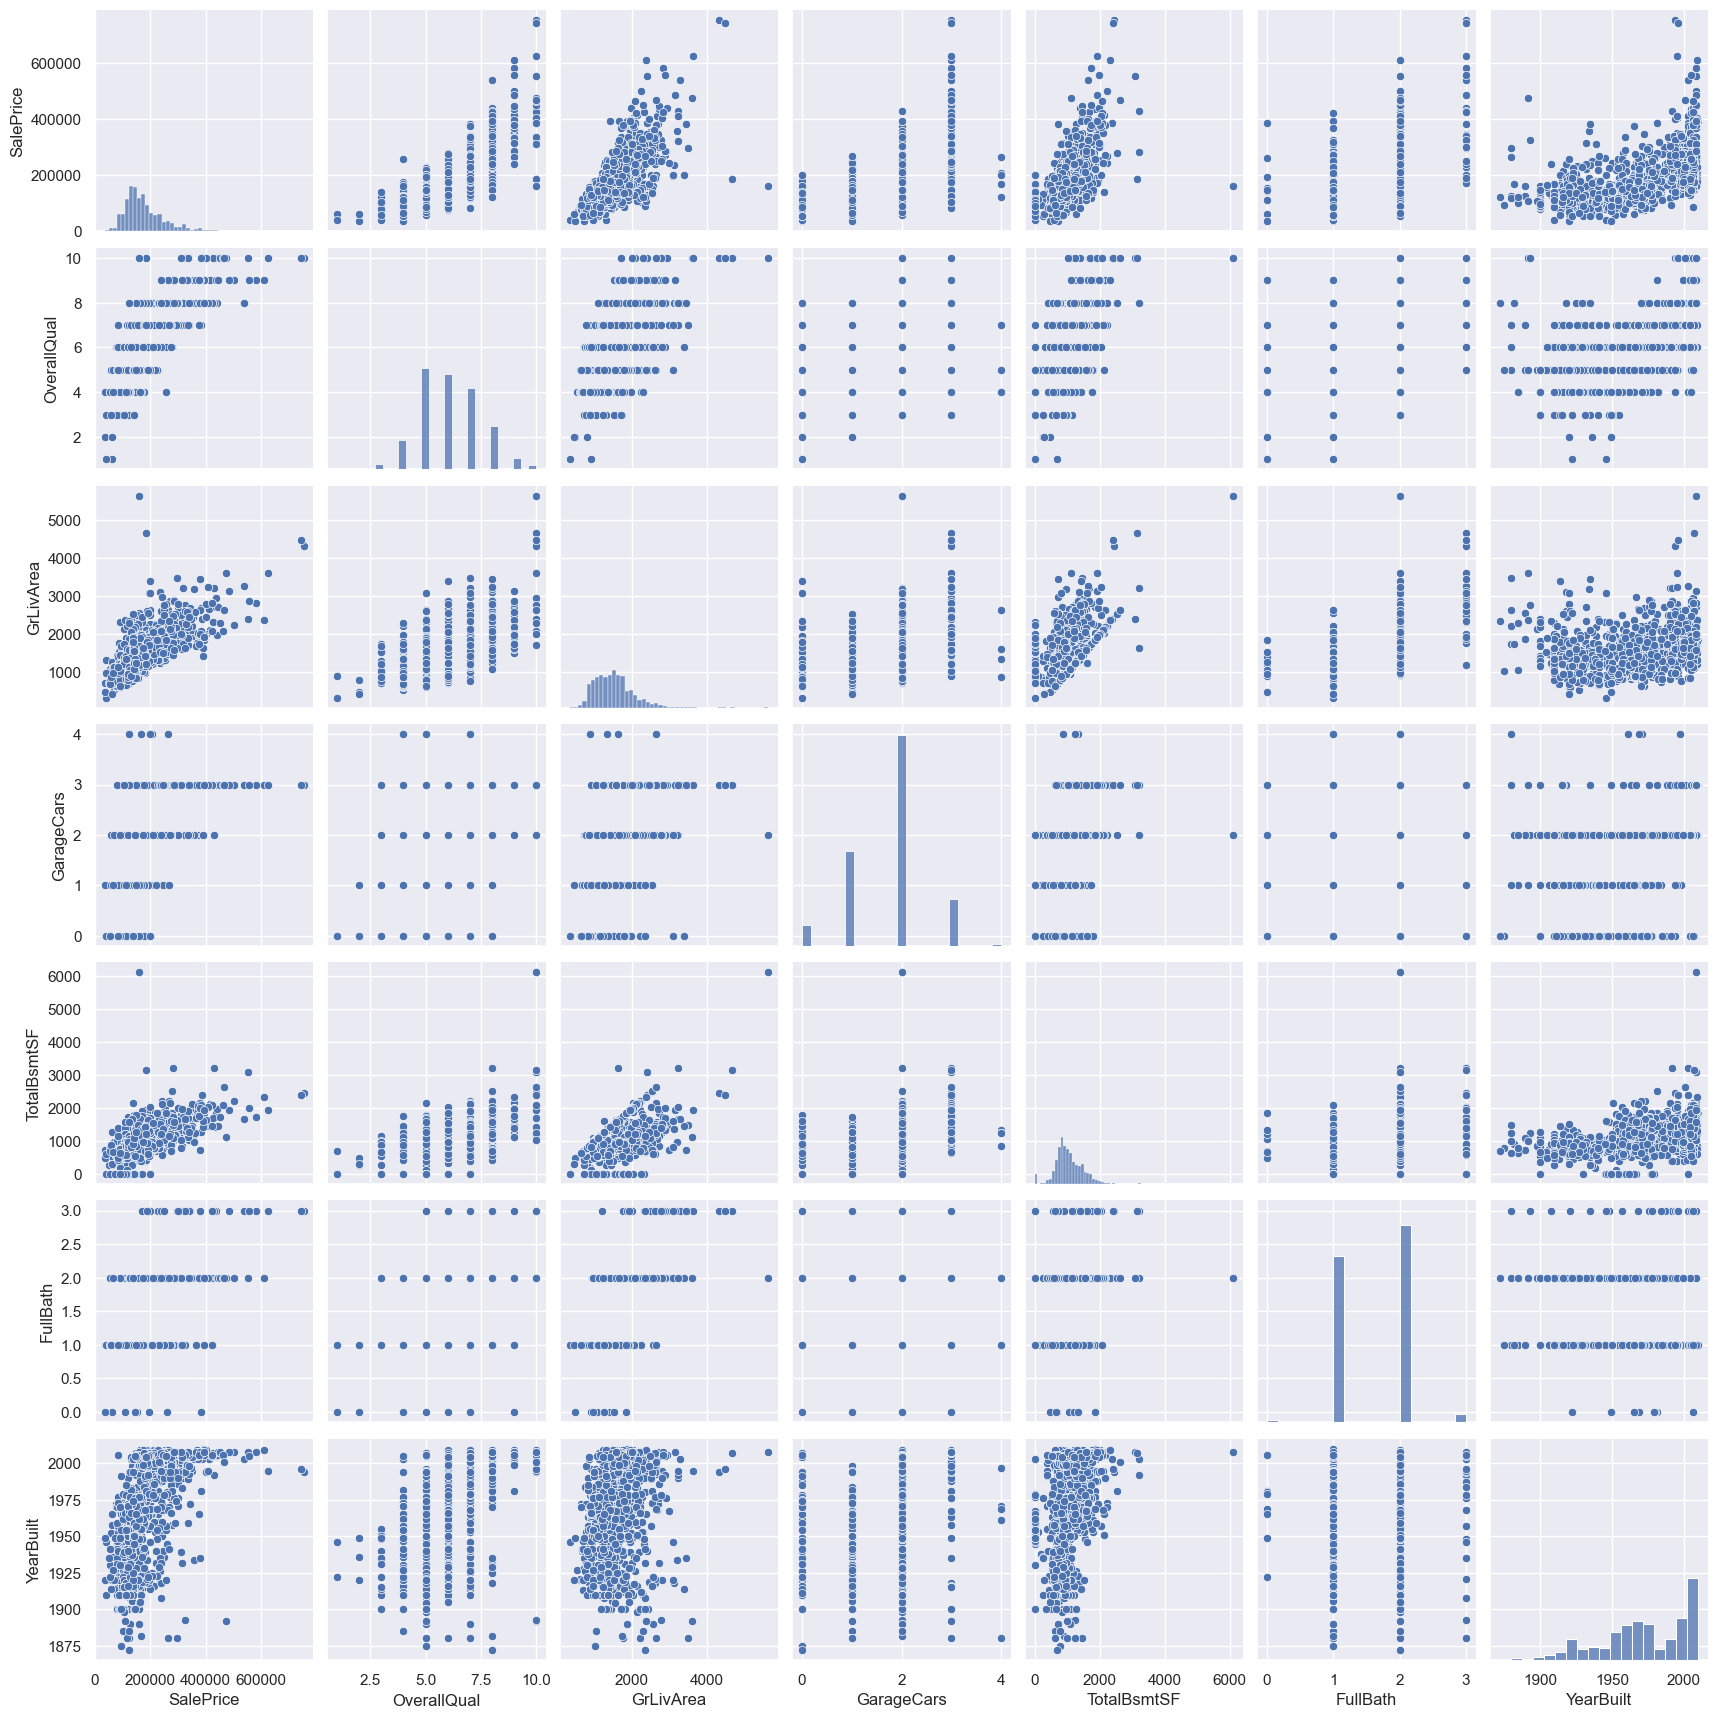

In [23]:
# Scatter plots between 'SalePrice' and correlated variables
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show()


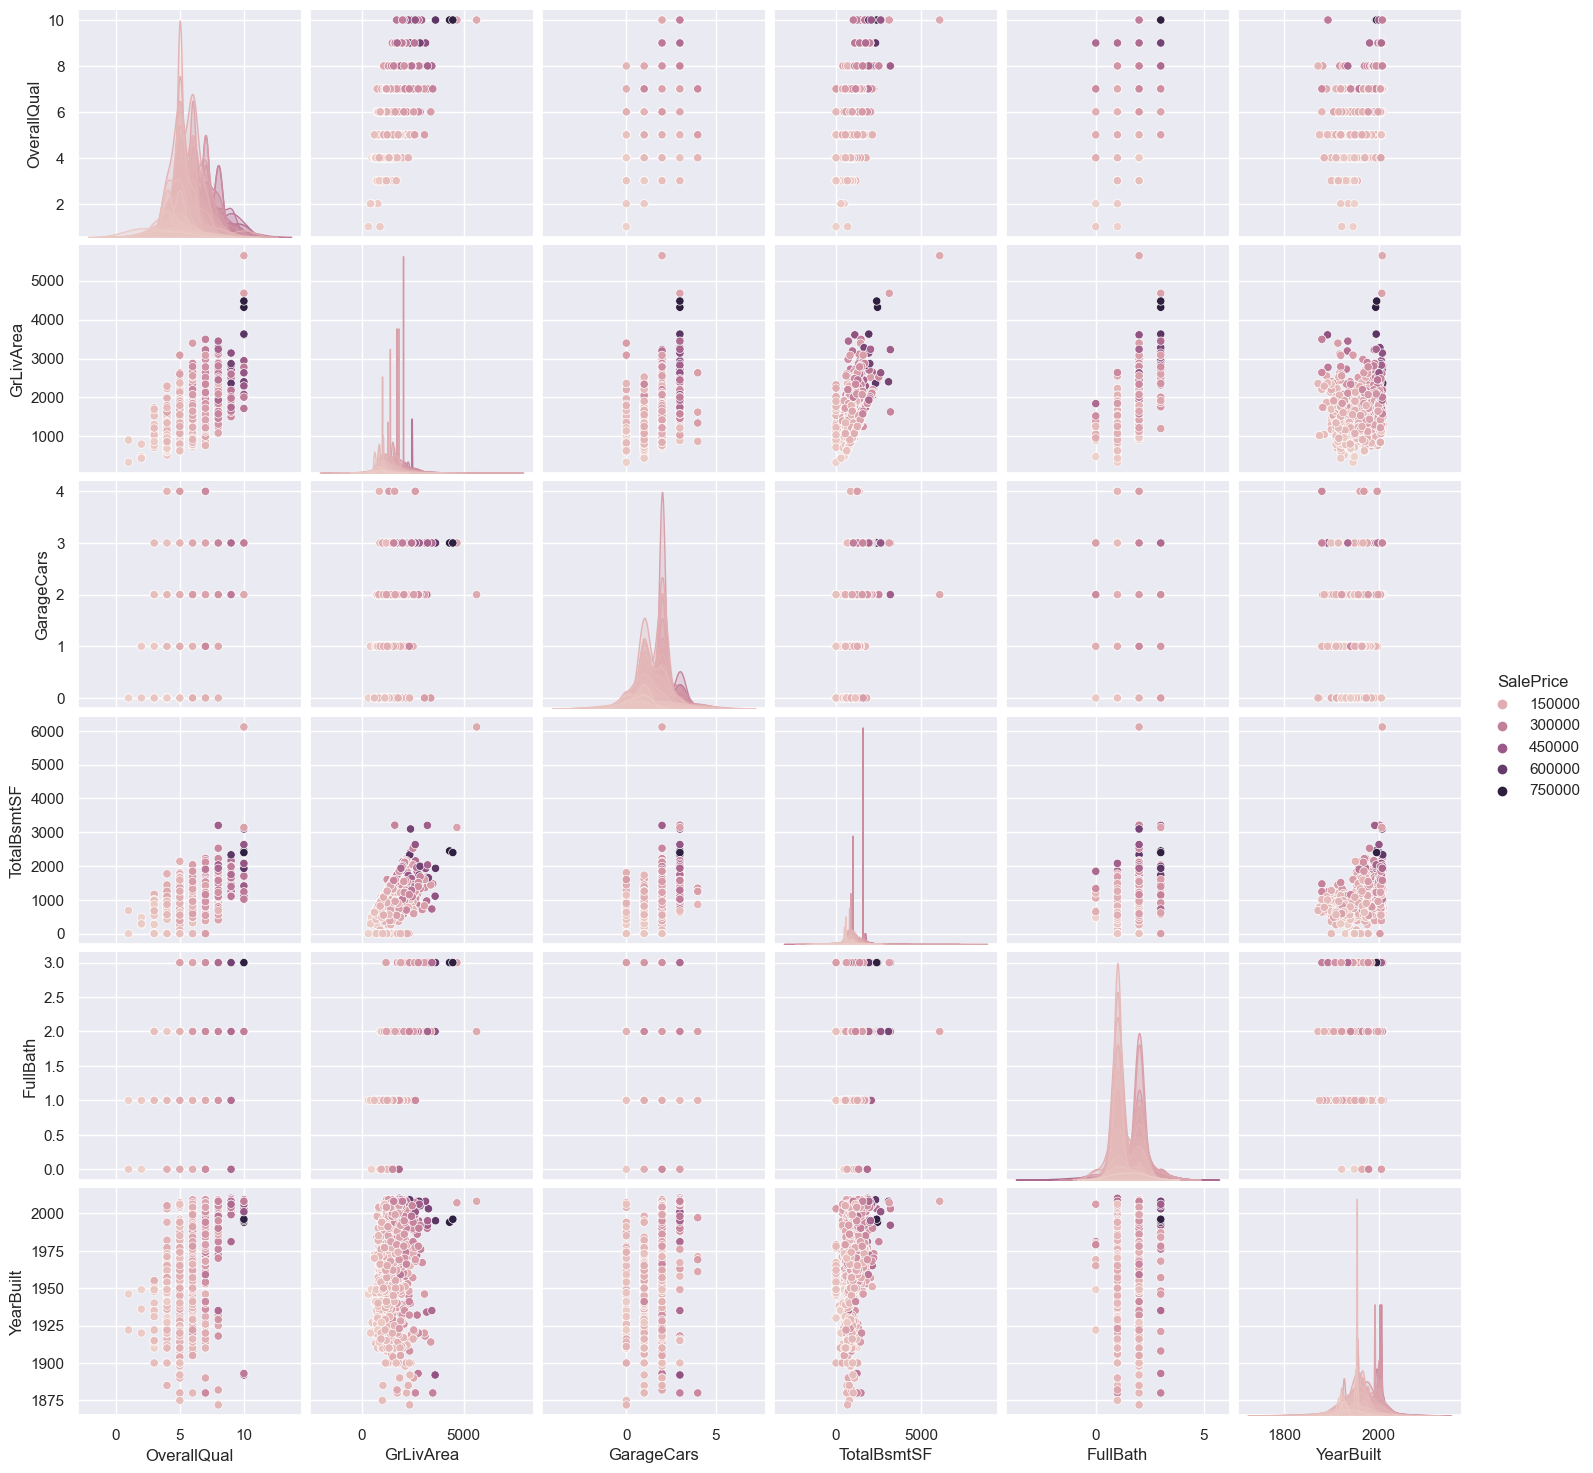

In [24]:
# Scatter plots of 'SalePrice' and other factors
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
hue_var = 'SalePrice'  # Specify the variable to use for coloring the points
sns.pairplot(df_train[cols], hue=hue_var, size=2.5)
plt.show()


In [25]:
# Missing data analysis
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [26]:
# Handling missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()  # Checking if there's any missing data remaining

0

In [27]:
# Outliers analysis
# Standardizing the 'SalePrice' data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:]
print('Outer range (low) of the distribution:')
print(low_range)
print('\nOuter range (high) of the distribution:')
print(high_range)

Outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

Outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

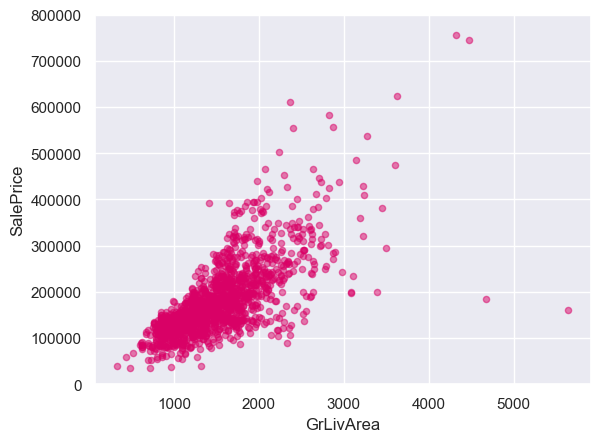

In [28]:
# Bivariate analysis - SalePrice vs GrLivArea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000), color='#d90166', alpha=0.5)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

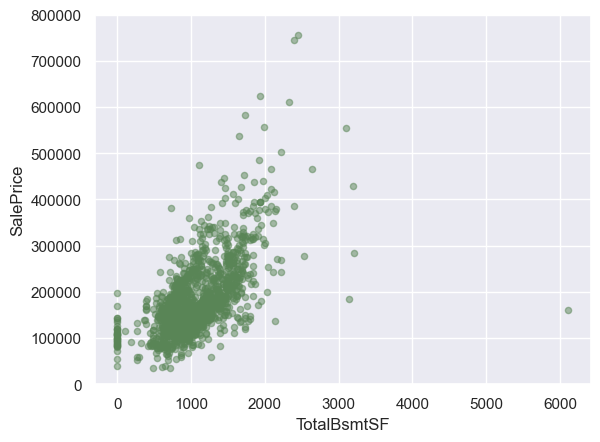

In [29]:
# Bivariate analysis - SalePrice vs TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000), color='#598556', alpha=0.5)

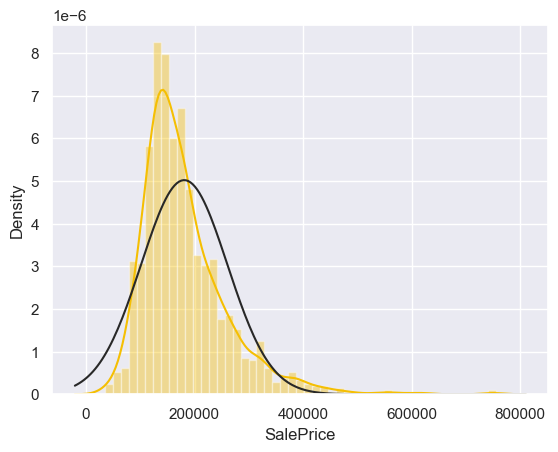

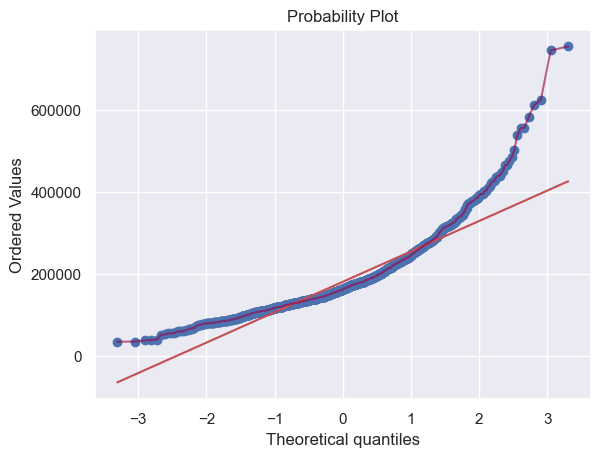

In [30]:
# Histogram, Kurtosis, and Skewness analysis
# Histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm, color='#f5bf03')
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.plot(res[0][0], res[0][1], color='#990147', alpha=0.6)

In [31]:
# The 'SalePrice' distribution is not normal, showing positive skewness and deviating from the diagonal line.
# However, a simple log transformation can address this issue.

In [32]:
# Applying log transformation to 'SalePrice'
df_train['SalePrice'] = np.log(df_train['SalePrice'])

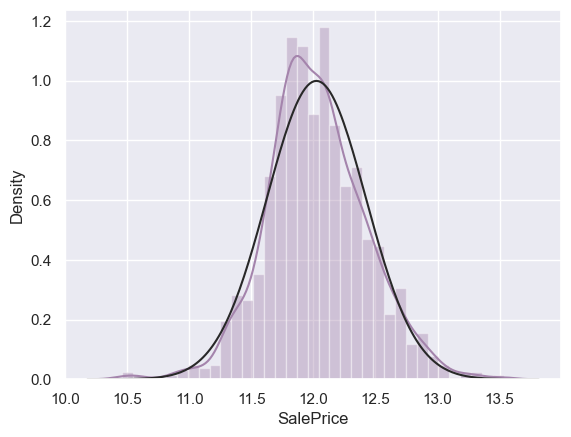

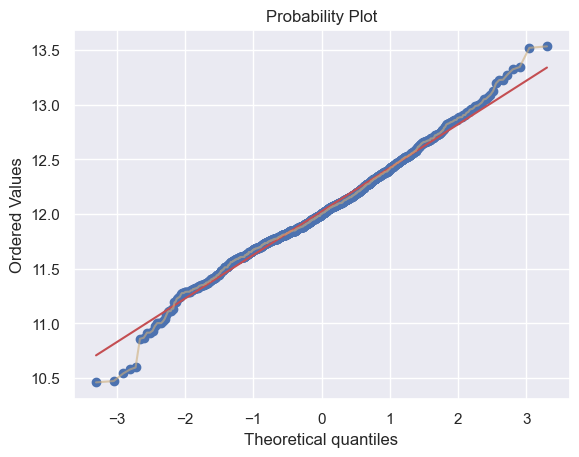

In [33]:
# Histogram and normal probability plot for 'SalePrice' after log transformation
sns.distplot(df_train['SalePrice'], fit=norm, color='#a484ac')
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.plot(res[0][0], res[0][1], color='#cfaf7b', alpha=0.6)

In [34]:
# Applying log transformation to 'GrLivArea'
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

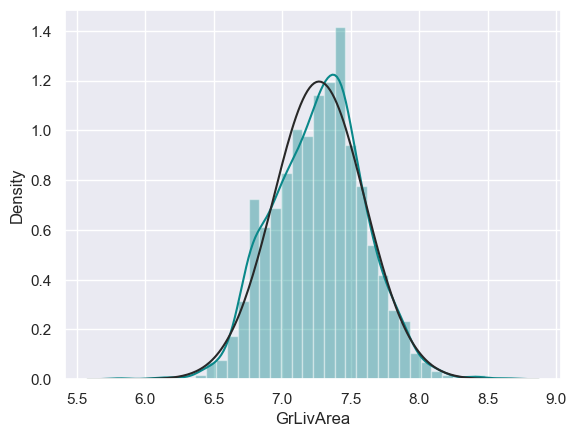

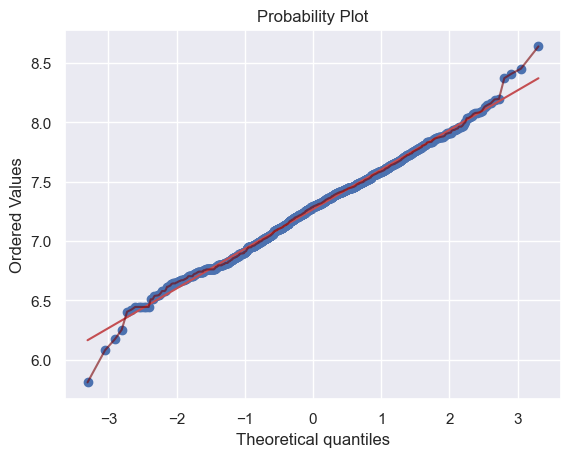

In [35]:
# Histogram and normal probability plot for 'GrLivArea' after log transformation
sns.distplot(df_train['GrLivArea'], fit=norm, color='#0a888a')
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)
plt.plot(res[0][0], res[0][1], color='#770001', alpha=0.6)

In [36]:
# Applying log transformation to 'TotalBsmtSF' (excluding zeros)
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1
df_train.loc[df_train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

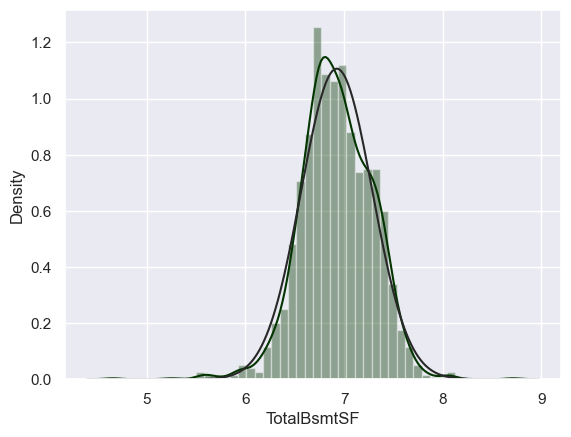

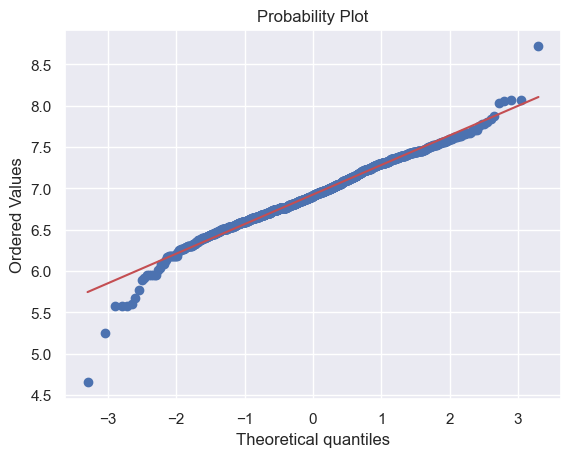

In [37]:
# Histogram and normal probability plot for 'TotalBsmtSF' after log transformation
sns.distplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit=norm, color='#033500')
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot=plt)

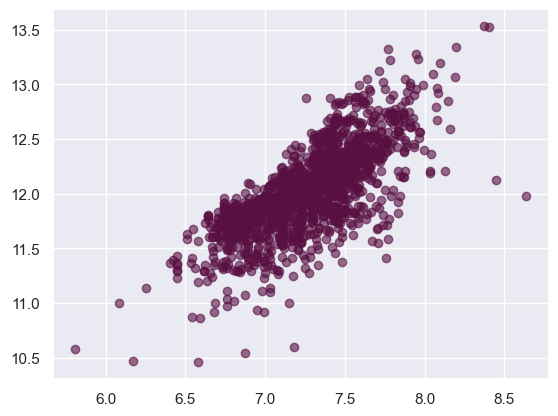

In [38]:
# Scatter plot for 'GrLivArea' and 'SalePrice'
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'], color='#580f41', alpha=0.6)


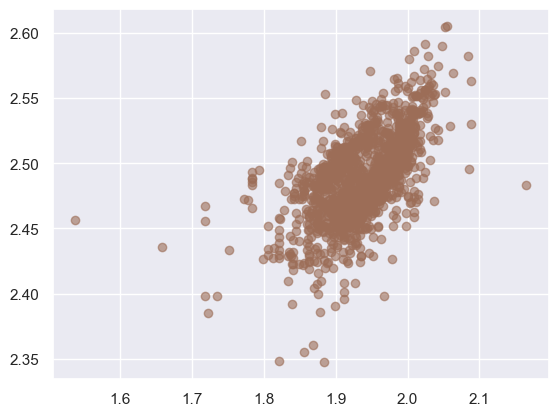

In [41]:
# Scatter plot for 'TotalBsmtSF' and 'SalePrice' (excluding zeros)
plt.scatter(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF'] > 0]['SalePrice'], color='#9c6d57', alpha=0.6)


In [42]:

# Convert categorical variables into dummy variables
df_train = pd.get_dummies(df_train)